# Manual Graph of Thoughts Demo: Sort List with Simulated Language Model
This example shows how to use the `pure_graph_of_thoughts` package for manual graph of operations construction using the simulated Language Model.

The example task `sort_list` (defined in `sort_list.py`) is used.

## Construct Graph of Operations
The graph of operations is constructed.

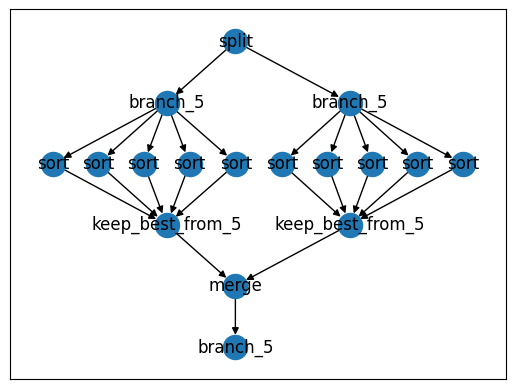

In [1]:
from pure_graph_of_thoughts.api.graph.operation import OperationNode, GraphOfOperations
from pure_graph_of_thoughts.visualization import plot_graph

from auto_graph_of_thoughts.tasks.sort_list import op_split, op_merge, op_sort, op_branch_5, op_keep_best_from_5


def _create_sort_list_graph_of_operations() -> GraphOfOperations:
    source = OperationNode.of(op_split)
    branch_sink_nodes = []
    for _ in range(0, 2):
        branch_node = source.append_operation(op_branch_5)
        sort_nodes = []
        for _ in range(5):
            sort_node = branch_node.append_operation(op_sort)
            sort_nodes.append(sort_node)

        keep_best = OperationNode.of(op_keep_best_from_5)
        branch_sink_nodes.append(keep_best)

        for sort_node in sort_nodes:
            sort_node.append(keep_best)

    merge = OperationNode.of(op_merge)
    for branch_sink_node in branch_sink_nodes:
        branch_sink_node.append(merge)

    branches = merge.append_operation(op_branch_5)
    sort_nodes = []
    for branch in branches.successors:
        branch.append_operation(op_sort)
        sort_nodes.append(branch)

    keep_best = OperationNode.of(op_keep_best_from_5)
    for sort_node in sort_nodes:
        sort_node.append(keep_best)

    return GraphOfOperations.from_source(source)


sort_list_graph_of_operations: GraphOfOperations = _create_sort_list_graph_of_operations()
plot_graph(sort_list_graph_of_operations)

## Execute Graph of Operations
A simulated language model is used as the executing language model.

In [2]:
from auto_graph_of_thoughts.language_model.simulated_chat_gpt_sort_list import \
    create_simulated_deterministic_chat_gpt_sort_list
from pure_graph_of_thoughts.controller import CompleteGraphController
import logging
logging.basicConfig(level=logging.INFO)

SEED = 0

ctrl = CompleteGraphController(
    language_model=create_simulated_deterministic_chat_gpt_sort_list(SEED)
)

INFO:CompleteGraphController:Traversing node 5adc7344-502b-455e-92e4-33a52901cd9a
INFO:CompleteGraphController:Processing operation PromptOperation(name='split', n_inputs=1, n_outputs=2, type=<OperationType.GENERATE: 'generate'>, output_complexity=Fraction(1, 2))
INFO:CompleteGraphController:Traversing node c10eb492-bde6-4828-b589-2dc6162b88f4
INFO:CompleteGraphController:Processing operation ExecOperation(name='branch_5', n_inputs=1, n_outputs=5, type=<OperationType.GENERATE: 'generate'>, output_complexity=Fraction(1, 1))
INFO:CompleteGraphController:Traversing node bcbfe9dd-3916-4db4-9f00-dcf372ae8666
INFO:CompleteGraphController:Processing operation ExecOperation(name='branch_5', n_inputs=1, n_outputs=5, type=<OperationType.GENERATE: 'generate'>, output_complexity=Fraction(1, 1))
INFO:CompleteGraphController:Traversing node 9d7ea350-5f98-4613-b6b3-3d763b7a95e0
INFO:CompleteGraphController:Processing operation PromptOperation(name='sort', n_inputs=1, n_outputs=1, type=<OperationType.

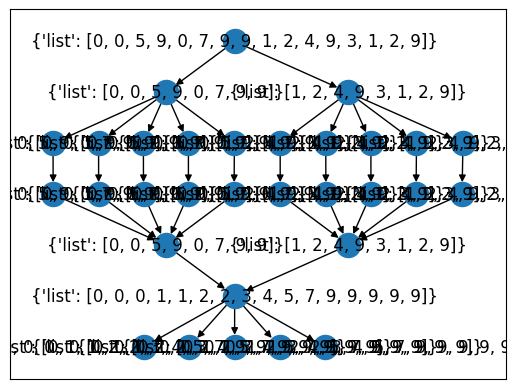

In [3]:
list = [0, 0, 5, 9, 0, 7, 9, 9, 1, 2, 4, 9, 3, 1, 2, 9]
sort_list_graph_of_thoughts = ctrl.execute_graph(sort_list_graph_of_operations, init_state={
    'list': list
})
plot_graph(sort_list_graph_of_thoughts)

In [4]:
sort_list_graph_of_thoughts.sinks[0].thought.state

{'list': [0, 0, 0, 1, 1, 2, 2, 3, 4, 5, 7, 9, 9, 9, 9, 9]}

In [5]:
sorted(list)

[0, 0, 0, 1, 1, 2, 2, 3, 4, 5, 7, 9, 9, 9, 9, 9]